In [2]:
# package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# column header 
columns = ['hair']

# binary list csv for categorical testing
bnry_data = pd.read_csv("bnry_trial5.csv", names=columns) 

print(bnry_data)

#pgp_names = np.asarray

    hair
0      0
1      0
2      0
3      1
4      1
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     1
14     1
15     0
16     0
17     1
18     0
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     0
27     0
28     1
29     0
30     1
31     0
32     0
33     1
34     0
35     1
36     0
37     0
38     0
39     1
40     1
41     0
42     0
43     0
44     0
45     0
46     1
47     0
48     1
49     0
50     0
51     0
52     0
53     0


In [4]:
# load the formatted pgp numpy array
pgp_filtered = np.load("pgp_filtered_trial5.pkl")

from sklearn import preprocessing
pgp_filtered = preprocessing.scale(pgp_filtered.astype('double')) # scale the data

In [5]:
print(pgp_filtered.shape)

(54, 2469062)


In [6]:
bnry_data = np.asarray(bnry_data)
X = pgp_filtered
y = bnry_data

# print the shapes of X and y
print(X.shape)
print(y.shape)

(54, 2469062)
(54, 1)


In [14]:
# C value testing

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix


def display_correct():
    if counter == 0 and scoresk[0] == 1:
        return "Correct"
    elif scoresk[counter] < scoresk[counter-1]:
        return "Incorrect" + str(counter)
    else:
        return "Correct"
'''
[0.001, 0.0027825594022071257, 0.007742636826811269, 0.021544346900318832, 
0.05994842503189409, 0.1668100537200059, 0.46415888336127775, 1.2915496650148828, 
3.593813663804626, 10.0]

'''   
    
    
c_scores = []

for i in range(1, 200, 10):
    
    svc_test = LinearSVC(penalty='l1', class_weight='balanced', C=(i * 0.001), dual=False, max_iter=5000)

    kf = KFold(n_splits=9, random_state=None, shuffle=False)
    #vals = np.logspace(-3, 1, 10).tolist()
    #print(vals)
    
    scoresk = []
    counter = 0
    predictedk = []
    testedk = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc_test.fit(X_train, y_train.ravel())
        y_pred = svc_test.predict(X_test)
        scoresk.append(accuracy_score(y_test, y_pred))
    
        predictedk.append(y_pred)
        testedk.append(y_test)
    
    print(np.mean(np.asarray(scoresk)))
    
    score_display = str(np.mean(np.asarray(scoresk))) + str(i * 0.001)
    c_scores.append(score_display)
    
print(c_scores)



0.486111111111
0.486111111111
0.496913580247
0.461419753086
0.424382716049
0.462962962963
0.450617283951
0.450617283951
0.450617283951
0.462962962963
0.475308641975
0.475308641975
0.475308641975
0.5
0.5
0.524691358025


KeyboardInterrupt: 

In [15]:
print(c_scores)

['0.4861111111110.001', '0.4861111111110.011', '0.4969135802470.021', '0.4614197530860.031', '0.4243827160490.041', '0.4629629629630.051000000000000004', '0.4506172839510.061', '0.4506172839510.07100000000000001', '0.4506172839510.081', '0.4629629629630.091', '0.4753086419750.101', '0.4753086419750.111', '0.4753086419750.121', '0.50.131', '0.50.14100000000000001', '0.5246913580250.151']


In [19]:
# the actual machine learning

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
 
svc_test = LinearSVC(penalty='l1', class_weight='balanced', C=0.06, dual=False, max_iter=5000) #.15 highest

kf = KFold(n_splits=9, random_state=None, shuffle=False)
#vals = np.logspace(-3, 1, 10).tolist()
#print(vals)
    
scoresk = []
predictedk = []
testedk = []
    
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc_test.fit(X_train, y_train.ravel())
    y_pred = svc_test.predict(X_test)
    scoresk.append(accuracy_score(y_test, y_pred))
    print(np.mean(np.asarray(scoresk)))
    
    predictedk.append(y_pred)
    testedk.append(y_test)
    
print(np.mean(np.asarray(scoresk)))

0.333333333333
0.5
0.5
0.458333333333
0.5
0.5
0.52380952381
0.520833333333
0.5
0.5


In [16]:
print(list(map(list, testedk)))
print(predictedk)

[[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64)], [array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64)], [array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64)], [array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64)], [array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64)], [array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64)], [array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64)], [array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)], [array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64)]]
[array([1, 0, 1, 1], dtype=int64), array([0, 1, 0, 1], dtype=int64), array([0, 0,

In [10]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb = ()

y_predg = gnb.fit(X, y.ravel()).predict(X)

AttributeError: 'tuple' object has no attribute 'fit'

In [33]:
print(y_predg)
print(list(map(int, y)))
print(accuracy_score(y, y_predg))

[1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0
 0 1 1 1 0 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]
1.0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, LeaveOneOut, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=4)

# try K=1 through K=25 and record testing accuracy
for i in range(15):
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364
0.636363636364


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, LeaveOneOut, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=4)

# try K=1 through K=25 and record testing accuracy
scores = []
i = 0
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    print(i, accuracy_score(y_test, y_pred))
    scores.append(accuracy_score(y_test, y_pred))
    i += 1

0 0.545454545455
1 0.636363636364
2 0.636363636364
3 0.818181818182
4 0.818181818182
5 0.818181818182
6 0.818181818182
7 0.818181818182
8 0.818181818182
9 0.818181818182
10 0.818181818182
11 0.818181818182
12 0.818181818182
13 0.818181818182
14 0.818181818182
15 0.818181818182
16 0.818181818182
17 0.818181818182
18 0.818181818182
19 0.818181818182
20 0.818181818182
21 0.818181818182
22 0.818181818182
23 0.818181818182
24 0.818181818182
25 0.818181818182
26 0.818181818182
27 0.818181818182
28 0.818181818182


In [ ]:
# C testing

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix


def display_correct():
    if counter == 0 and scoresk[0] == 1:
        return "Correct"
    elif scoresk[counter] < scoresk[counter-1]:
        return "Incorrect" + str(counter)
    else:
        return "Correct"
'''
[0.001, 0.0027825594022071257, 0.007742636826811269, 0.021544346900318832, 
0.05994842503189409, 0.1668100537200059, 0.46415888336127775, 1.2915496650148828, 
3.593813663804626, 10.0]

'''   
    
    
c_scores = []

for i in range(10, 200, 15):
    
    svc_test = LinearSVC(penalty='l1', class_weight='balanced', C=(i * 0.001), dual=False, max_iter=5000)

    kf = KFold(n_splits=8, random_state=None, shuffle=False)
    #vals = np.logspace(-3, 1, 10).tolist()
    #print(vals)
    
    scoresk = []
    counter = 0
    predictedk = []
    testedk = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc_test.fit(X_train, y_train.ravel())
        y_pred = svc_test.predict(X_test)
        scoresk.append(accuracy_score(y_test, y_pred))
    
        predictedk.append(y_pred)
        testedk.append(y_test)
    
        print(np.mean(np.asarray(scoresk)))

        print("Iteration: " + str(counter + 1))
        counter += 1
    
    print(np.mean(np.asarray(scoresk)))
    
    score_display = str(np.mean(np.asarray(scoresk))) + str(i * 0.001)
    c_scores.append(score_display)
    
print(c_scores)



0.5
Iteration: 1
0.55
Iteration: 2
0.4
Iteration: 3
0.355555555556
Iteration: 4
0.284444444444
Iteration: 5
0.292592592593
Iteration: 6
0.28253968254
Iteration: 7


In [73]:
from sklearn.model_selection import cross_val_score

svc_test = LinearSVC(penalty='l1', class_weight='balanced', 
                         C=0.001, dual=False, max_iter=5000)
cv_scores = cross_val_score(svc_test, X, y, cv=10, scoring='accuracy')
print(cv_scores.mean())
print(cv_scores.std())

IndexError: too many indices for array

In [65]:
# leave on out validation

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix

svc_test = LinearSVC(penalty='l1', class_weight='balanced', 
                         C=.06, dual=False, max_iter=5000)

loo = LeaveOneOut()
bnry_data = np.asarray(bnry_data)
scores = []
counter = 0
predicted = []
tested = []
for train_index, test_index in loo.split(pgp_filtered):
    X_train, X_test = pgp_filtered[train_index], pgp_filtered[test_index]
    y_train, y_test = bnry_data[train_index], bnry_data[test_index]
    svc_test.fit(X_train, y_train.ravel())
    y_pred = svc_test.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
    predicted.append(y_pred)
    tested.append(y_test)
    
    print(np.mean(np.asarray(scores)))

    counter += 1
    print("Iteration: " + str(counter) + ", correct: " + str(bool(y_test == y_pred)) )
    if not bool(y_test == y_pred):
        print("Incorrect: ", test_index)
    
print(np.mean(np.asarray(scores)))


1.0
Iteration: 1, correct: True
1.0
Iteration: 2, correct: True
1.0
Iteration: 3, correct: True
1.0
Iteration: 4, correct: True
0.8
Iteration: 5, correct: False
Incorrect:  [4]
0.666666666667
Iteration: 6, correct: False
Incorrect:  [5]
0.571428571429
Iteration: 7, correct: False
Incorrect:  [6]
0.5
Iteration: 8, correct: False
Incorrect:  [7]
0.555555555556
Iteration: 9, correct: True
0.6
Iteration: 10, correct: True
0.636363636364
Iteration: 11, correct: True
0.666666666667
Iteration: 12, correct: True
0.615384615385
Iteration: 13, correct: False
Incorrect:  [12]
0.571428571429
Iteration: 14, correct: False
Incorrect:  [13]
0.533333333333
Iteration: 15, correct: False
Incorrect:  [14]
0.5
Iteration: 16, correct: False
Incorrect:  [15]
0.470588235294
Iteration: 17, correct: False
Incorrect:  [16]
0.5
Iteration: 18, correct: True
0.473684210526
Iteration: 19, correct: False
Incorrect:  [18]
0.45
Iteration: 20, correct: False
Incorrect:  [19]


KeyboardInterrupt: 

In [40]:
lst = []
lst.append(int(predicted[7]))

print(lst)
def predicted_list():
    lst = []
    i = 0
    while i < len(predicted):
        lst.append(int(predicted[i]))
        print(i+2, ": ", int(predicted[i]))
        i += 1
    return lst

def tested_list():
    lst = []
    i = 0
    while i < len(predicted):
        lst.append(int(tested[i]))
        print(i+2, ": ", int(tested[i]))
        i += 1
    return lst
        
        
        
predicted_new = predicted_list()

tested_new = tested_list()


print(predicted_new)

print(tested_new)

[1]
2 :  1
3 :  1
4 :  1
5 :  0
6 :  1
7 :  1
8 :  0
9 :  1
10 :  1
11 :  1
12 :  1
13 :  1
14 :  1
15 :  0
16 :  1
17 :  1
18 :  1
19 :  1
20 :  0
21 :  1
22 :  1
23 :  1
24 :  1
25 :  1
26 :  1
27 :  1
28 :  0
29 :  1
30 :  1
31 :  1
32 :  1
33 :  1
34 :  1
35 :  0
36 :  1
37 :  1
38 :  1
39 :  1
40 :  1
41 :  1
42 :  1
43 :  1
44 :  1
45 :  0
46 :  1
47 :  1
48 :  0
49 :  1
50 :  1
51 :  1
52 :  1
53 :  1
54 :  1
55 :  1
56 :  0
57 :  1
58 :  1
59 :  1
60 :  1
61 :  1
62 :  1
63 :  1
64 :  0
65 :  1
66 :  1
67 :  1
68 :  1
69 :  1
70 :  1
71 :  1
72 :  1
73 :  1
74 :  1
75 :  1
76 :  0
2 :  1
3 :  1
4 :  1
5 :  0
6 :  0
7 :  0
8 :  0
9 :  0
10 :  1
11 :  1
12 :  1
13 :  1
14 :  0
15 :  1
16 :  0
17 :  0
18 :  0
19 :  1
20 :  0
21 :  0
22 :  1
23 :  1
24 :  1
25 :  1
26 :  0
27 :  1
28 :  1
29 :  1
30 :  1
31 :  1
32 :  0
33 :  1
34 :  1
35 :  1
36 :  1
37 :  1
38 :  0
39 :  1
40 :  1
41 :  1
42 :  1
43 :  1
44 :  1
45 :  1
46 :  1
47 :  1
48 :  1
49 :  1
50 :  0
51 :  0
52 :  1
53 :

In [ ]:
print(lst)
def predicted_listk():
    lst = []
    i = 0
    while i < len(predictedk):
        lst.append(int(predictedk[i]))
        print(i+2, ": ", int(predictedk[i]))
        i += 1
    return lst

def tested_listk():
    lst = []
    i = 0
    while i < len(predictedk):
        lst.append(int(testedk[i]))
        print(i+2, ": ", int(testedk[i]))
        i += 1
    return lst
        
        
        
predictedk_new = predicted_listk()

testedk_new = tested_listk()


print(predictedk_new)

print(testedk_new)

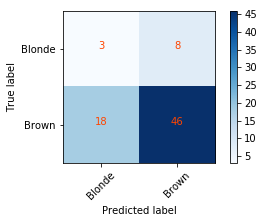

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

cnf_matrix = confusion_matrix(predicted_new, tested_new)
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')

classes = ['Blonde','Brown']

plt.grid('off')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color= "orangered")

plt.gcf().subplots_adjust(left=0.25, bottom = 0.35)

plt.savefig('Blue_Confusion_nored.png',format='png',dpi=300)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

cnf_matrix = confusion_matrix(predictedk_new, testedk_new)
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')

classes = ['Blonde','Brown']

plt.grid('off')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color= "orangered")

plt.gcf().subplots_adjust(left=0.25, bottom = 0.35)

plt.savefig('Blue_Confusion_noredk.png',format='png',dpi=300)

In [ ]:
coefs = svc.coef_[0]
nonzeroes = np.nonzero(coefs)
vals = zip(coefs[nonzeroes], nonzeroes)
print(vals)

In [45]:
nonzeroes[0][39]

1519732